<a href="https://colab.research.google.com/github/MAHMOUDPD/modi/blob/master/Solving_a_metabolistic_chemical_reaction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 (40 points)

Consider a metabolistic chemical reaction model:
$$
\begin{array}{l}
y'_{1} = - A y_{1} \\
y'_{2} = Ay_{1} - (B + C)y_{2} + Dy_{3} \\
y'_{3} = By_{2} - Dy_{3}.
\end{array}
$$

(*) Let us run the following blocks to import the true concentration data for substances `y1`, `y2`, and `y3`. The data is collected every 30 seconds for 10 minutes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data =  [[ 0.00000000e+00,  5.00000000e-01,  1.00000000e+00,
         1.50000000e+00,  2.00000000e+00,  2.50000000e+00,
         3.00000000e+00,  3.50000000e+00,  4.00000000e+00,
         4.50000000e+00,  5.00000000e+00,  5.50000000e+00,
         6.00000000e+00,  6.50000000e+00,  7.00000000e+00,
         7.50000000e+00,  8.00000000e+00,  8.50000000e+00,
         9.00000000e+00,  9.50000000e+00,  1.00000000e+01],
       [ 4.01833115e+03,  3.16959212e+03,  2.53728928e+03,
         1.92777173e+03,  1.58871586e+03,  1.15648713e+03,
         9.32015307e+02,  6.96489294e+02,  5.67332423e+02,
         3.96345214e+02,  4.03863223e+02,  2.24800636e+02,
         2.28764268e+02,  1.53093513e+02,  2.11955589e+02,
         1.11322353e+02, -1.20839777e+00, -5.13270948e+00,
         1.38594506e+02,  7.87228482e+01, -6.66497049e+01],
       [ 2.07185879e+03,  2.85894088e+03,  3.38371358e+03,
         3.63256299e+03,  3.61530925e+03,  3.58421571e+03,
         3.67064527e+03,  3.40927136e+03,  3.25507577e+03,
         3.12696194e+03,  2.85984423e+03,  2.84217576e+03,
         2.71796151e+03,  2.61838236e+03,  2.46328837e+03,
         2.39377893e+03,  2.23225821e+03,  2.10590151e+03,
         2.04493547e+03,  2.03349297e+03,  1.83491627e+03],
       [ 3.24234333e+03,  2.91694935e+03,  2.96751007e+03,
         2.83378350e+03,  2.86515723e+03,  2.80683279e+03,
         2.91928219e+03,  2.84227302e+03,  2.76040302e+03,
         2.75897773e+03,  2.67745268e+03,  2.56016309e+03,
         2.60883400e+03,  2.52032272e+03,  2.28067611e+03,
         2.31578828e+03,  2.14963613e+03,  2.13564413e+03,
         2.02058060e+03,  1.87617253e+03,  1.79143649e+03]]

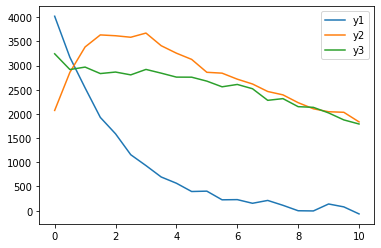

In [ ]:
data = np.array(data)
data.shape

t_true = data[0,:]
conc_true = data[1:,:].T

theplot = plt.plot(t_true,conc_true)
plt.legend(theplot,['y1', 'y2', 'y3'])
plt.show()

---

**QUESTION**

Use `RK4` with `T = 10`, `N = 501`, and take the initial values from the true data `conc_true` to \\
(1) numerically *solve* the above system of ODEs with parameters `A`, `B`, `C`, `D` valued in `[0.1, 0.2, ..., 1]`, and \\
(2) determine the best choice of parameters `A`, `B`, `C`, `D` that fits best to the real data of `y1`, `y2`, `y3` given in the matrix `conc_true`. \\
(3) plot the numerical solution and the true data together in one axis to observe the fitting. \\
*Hint: Use `np.linalg.norm` to compare the numerical solution at each given time with the true data.* \\
*Note: Do not be surprised by the long compiling time. My code took roughly 3 minutes.* \\
The finished result should look similar to the following figure: \\
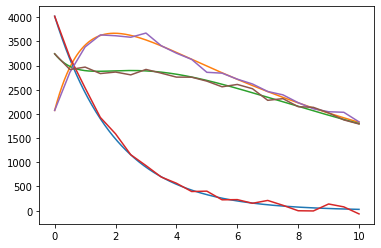

# Solution

## Use `RK4` with `T = 10`, `N = 501`, and take the initial values from the true data `conc_true` to:

(1) numerically *solve* the above system of ODEs with parameters `A`, `B`, `C`, `D` valued in `[0.1, 0.2, ..., 1]`,

(2) determine the best choice of parameters `A`, `B`, `C`, `D` that fits best to the real data of `y1`, `y2`, `y3` given in the matrix `conc_true`. \\


In [ ]:
def RungeKutta4thOrder(f, y0, T, n  ):
  
  dt = T/n
  m = len(y0)
  t0 = 0
  Time = np.linspace(t0,T,num=n)
  Y = np.zeros([m,n])
  Y[:,0] = y0

  for i in range(1,n):
    k1 = f(t0, y0)
    k2 = f( (t0 + (dt/2) ), (y0 + (dt*k1/2)) )
    k3 = f( (t0 + (dt/2) ), (y0 + (dt*k2/2)) )
    k4 = f( (t0 + dt), (y0 + dt*k3) )
    
    y1 = y0 + (1/6)*dt*( k1 + 2*k2 + 2*k3 + k4)
    Y[:,i] = y1
    y0 = np.copy(y1)
  
  Y = Y.T
  return Time, Y

In [ ]:
from tqdm import tqdm # this library use to output a smart progress bar, it shows the elapsed time and estimated time remaining
y0 = np.array(conc_true[0,:]) # the initial boundary conditions
N = 501
T = 10
#This nested for loops performs an exhaustive search for the best paramaters A,B,C,D from interval [0.1,...1.0]
init_error = 1E4
params = {'Constants':np.linspace(0.1,1.0, num=10)}
for i in tqdm(params['Constants'], desc="Loading...for values of A"):
  A = i
  for j in params['Constants']:
    B = j
    for k in params['Constants']:
      C = k
      for l in params['Constants']:
        D = l
        # Defining the mathematic model 
        f = lambda t, y: np.array([-A*y[0], A*y[0] - (B+C)*y[1] + D*y[2], B*y[1]-D*y[2]])
        # Calling the RK4 function
        Time, Y = RungeKutta4thOrder(f,y0,T,N)

        y1 = np.zeros([21,3]) # Initializing a matrix of the shape (21, 3)
        p = 0
        for q in range(len(Time)):
          if q%25 == 0: # this will yield 21 indices from 501 which are use as row-indices values of the matrix Y 
            y1[p,:]=Y[q,:] 
            p+=1
        error = np.linalg.norm(y1 - conc_true)
        if error < init_error:
          a,b,c,d = A, B, C, D
          Y1 = Y
          init_error = error

Loading...for values of A: 100%|██████████| 10/10 [03:02<00:00, 18.22s/it]


A = 0.5, B = 0.4, C = 0.2, D = 0.5


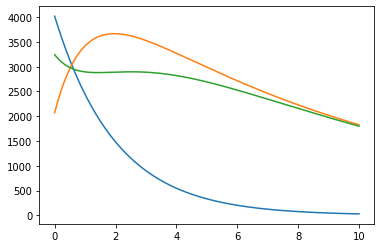

In [ ]:
# print out the optimal values and plotting the result A = 0.5, B = 0.4, C = 0.2, D = 0.5
print(f'A = {a}, B = {b}, C = {c}, D = {d}')
plt.plot(Time, Y1)
plt.show()

(3) plot the numerical solution and the true data together in one axis to observe the fitting. \\
*Hint: Use `np.linalg.norm` to compare the numerical solution at each given time with the true data.* \\
*Note: Do not be surprised by the long compiling time. My code took roughly 3 minutes.* \\
The finished result should look similar to the following figure: \\


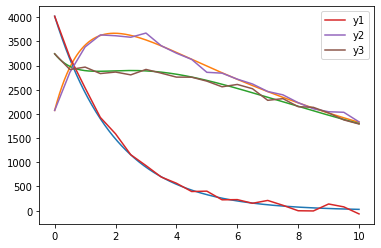

In [ ]:
plt.plot(Time, Y1)
theplot = plt.plot(t_true,conc_true)
plt.legend(theplot,['y1', 'y2', 'y3'])
plt.show()